In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
#warnings
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [34]:
df=pd.read_csv('/content/Glass Identification Database.csv',header=None)

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Rename the column name in dataset

In [36]:
rename_columns={0:'RI',1:'Na',2:'Mg',3:'Al',4:'Si',5:'K',6:'Ca',7:'Ba',8:'Fe',9:'Glass_type'}
# Rename columns
df = df.rename(columns=rename_columns)

In [37]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Target:
  11. Type of glass: (class attribute)\
      -- 1 building_windows_float_processed\
      -- 2 building_windows_non_float_processed\
      -- 3 vehicle_windows_float_processed\
      -- 4 vehicle_windows_non_float_processed (none in this database)\
      -- 5 containers\
      -- 6 tableware\
      -- 7 headlamps

#EDA(Explotary Data Analysis):-

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   Glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [39]:
df["Glass_type"].value_counts()

,count
Glass_type,
2,76
1,70
7,29
3,17
5,13
6,9


In [40]:
#check the null vales
df.isnull().sum().any()

False

In [41]:
#check the duplicated values
df.duplicated().sum()

1

In [42]:
#drop duplicated row
df.drop_duplicates(inplace=True)

In [43]:
#shape of dataset
df.shape

(213, 10)

#spliting dataset

In [44]:
X=df.drop('Glass_type',axis=1)
y=df['Glass_type']   #target column in y

#scaling dataset

In [45]:
scaler=StandardScaler()
X_scaled =scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=113)

#Building Model

In [51]:
model=Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(128, activation='relu'))  # Second hidden layer
model.add(Dense(8, activation='softmax'))  # Output layer # 8 units for 8 classes

In [52]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=10)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3043 - loss: 1.9787 - val_accuracy: 0.4412 - val_loss: 1.6580
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4875 - loss: 1.6103 - val_accuracy: 0.5294 - val_loss: 1.3053
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5320 - loss: 1.2335 - val_accuracy: 0.5588 - val_loss: 1.0568
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6167 - loss: 0.9843 - val_accuracy: 0.6471 - val_loss: 0.9524
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6994 - loss: 0.9041 - val_accuracy: 0.6471 - val_loss: 0.9028
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6546 - loss: 0.7579 - val_accuracy: 0.6176 - val_loss: 0.9214
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7526 - loss: 0.7089 - val_accuracy: 0.6471 - val_loss: 0.9165
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7226 - loss: 0.6979 - val_accuracy: 0.6176 - val_loss

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.3f}')

2/2 - 0s - 12ms/step - accuracy: 0.7442 - loss: 0.6476
Test accuracy: 0.744


In [55]:
predictions = model.predict(X_test[:5])
predicted_classes = tf.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
Predicted classes: [1 1 2 2 1]


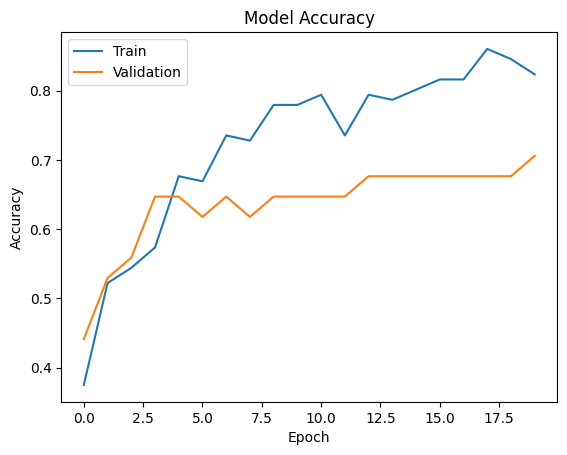

In [57]:
#check the accoracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

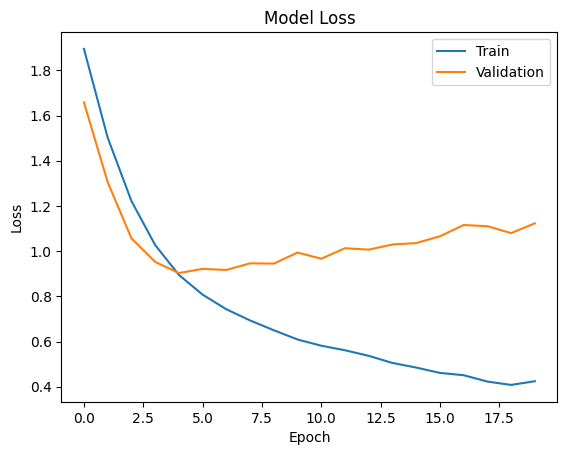

In [58]:
#check the losss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')